# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import os

import warnings
warnings.filterwarnings('ignore')

# Explore Data

In [2]:
with_mask = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')

In [3]:
print(with_mask[0:5])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']


In [4]:
print(with_mask[-5:])

['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [5]:
 len(with_mask)

3725

In [6]:
without_mask = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')

In [7]:
print(without_mask[0:5])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']


In [8]:
print(without_mask[-5:])

['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [9]:
 len(without_mask)

3828

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
with_mask_labels[0:5]

[1, 1, 1, 1, 1]

In [12]:
without_mask_labels[0:5]

[0, 0, 0, 0, 0]

In [13]:
labels = with_mask_labels + without_mask_labels

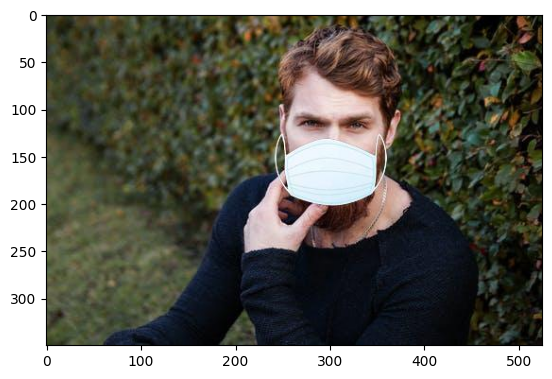

In [14]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

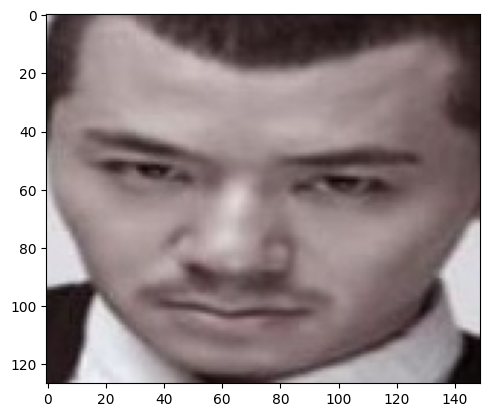

In [15]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()

# Image Processing

### Resize the Images and Convert the images to numpy arrays

In [16]:
with_mask_path ="/kaggle/input/face-mask-dataset/data/with_mask/"

data = []

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [17]:
type(data)

list

In [18]:
data[10]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 64,  49,  56],
        [ 59,  43,  47],
        [ 44,  26,  27],
        ...,
        [ 13,  11,  12],
        [  6,   4,   5],
        [197, 195, 196]],

       [[ 64,  52,  58],
        [ 45,  31,  34],
        [ 34,  18,  18],
        ...,
        [ 13,  11,  12],
        [  3,   2,   2],
        [197, 195, 196]],

       [[ 74,  64,  69],
        [ 30,  18,  20],
        [ 32,  18,  18],
        ...,
        [ 12,  10,  11],
        [  3,   2,   2],
        [197, 195, 196]]

In [19]:
data[10].shape

(128, 128, 3)

In [20]:
x = np.array(data)
y = np.array(labels)

In [21]:
type(x)

numpy.ndarray

# Modeling

### Train Test Split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
# scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [24]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [26]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10


I0000 00:00:1727104735.660324      70 service.cc:145] XLA service 0x7fc62800bd80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727104735.660385      70 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 19/170 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5352 - loss: 1.2154

I0000 00:00:1727104740.530760      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - acc: 0.6719 - loss: 0.7055 - val_acc: 0.9008 - val_loss: 0.2267
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8795 - loss: 0.3088 - val_acc: 0.9355 - val_loss: 0.1772
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9065 - loss: 0.2359 - val_acc: 0.9421 - val_loss: 0.1510
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9234 - loss: 0.1887 - val_acc: 0.9455 - val_loss: 0.1415
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9358 - loss: 0.1519 - val_acc: 0.9504 - val_loss: 0.1418
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9489 - loss: 0.1325 - val_acc: 0.9570 - val_loss: 0.1424
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9651 - loss: 0.0921 - val_acc: 0.9339 - val_loss: 0.2196
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9563 - loss: 0.1073 - val_acc: 0.9405 - val_loss: 0.1918
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc:

In [27]:
model.evaluate(x_test_scaled, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.9335 - loss: 0.3304


[0.3227536976337433, 0.9344804883003235]

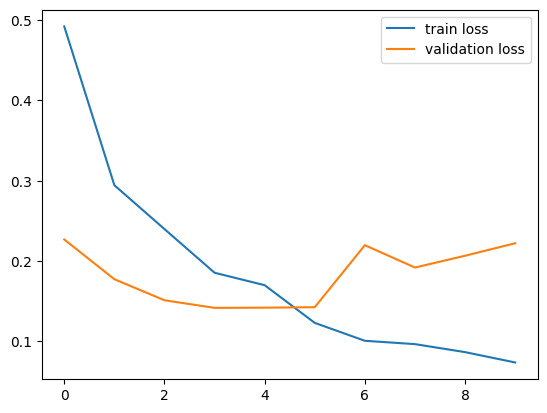

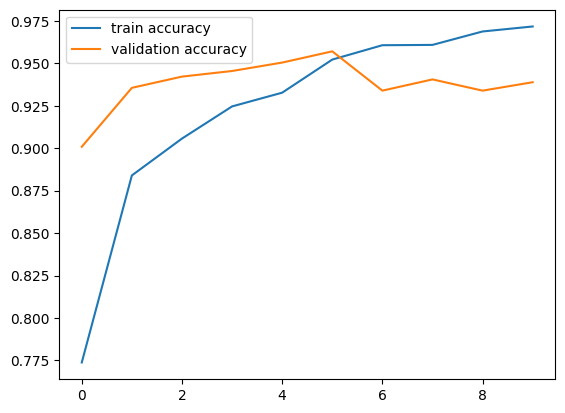

In [28]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#### Predictive System

In [29]:
"""
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
"""

"\ninput_image_path = input('Path of the image to be predicted: ')\n\ninput_image = cv2.imread(input_image_path)\n\ncv2_imshow(input_image)\n\ninput_image_resized = cv2.resize(input_image, (128,128))\n\ninput_image_scaled = input_image_resized/255\n\ninput_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])\n\ninput_prediction = model.predict(input_image_reshaped)\n\nprint(input_prediction)\n\n\ninput_pred_label = np.argmax(input_prediction)\n\nprint(input_pred_label)\n\n\nif input_pred_label == 1:\n\n  print('The person in the image is wearing a mask')\n\nelse:\n\n  print('The person in the image is not wearing a mask')\n"